# Weight matrix analysis for $L=48$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy import stats
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(12)

import sys
sys.path.append('/modules')
from modules.mc_ising2d import IsingMC
from modules.net import Net
from rbm import RBM

Tc_Ons = 2 / ( np.log(1 + np.sqrt(2)) )
Tc_MF = 4.0
L = 48

Loading the RBM model.

In [2]:
rbm_L048_all = RBM()
rbm_L048_all = torch.load('RBM_trained_models/RBM_model_T_complete_nv2304_nh2304_lr1.0E-03_k1_bsize100_nepochs5000.pt',
                 map_location=torch.device('cpu'))

W_L048_all, v, h = rbm_L048_all.parameters()
del v
del h

## Complete

### Analysis of $ {\cal W}$

/home/rodrigo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


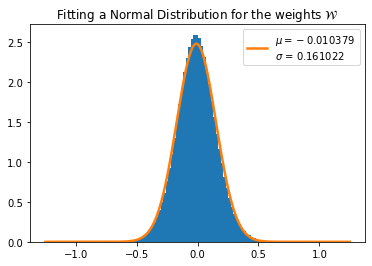

In [3]:
W_ = W_L048_all.numpy().reshape((W_L048_all.shape[0]*W_L048_all.shape[1]))

# Plot normalized histogram 
plt.hist(W_, bins= 100, density= True)

# Maximum and minimum of xticks to compute the theoretical distribution 
x_min, x_max = min(plt.xticks()[0]), max(plt.xticks()[0])  
domain = np.linspace(x_min, x_max, len(W_))

# Fitting a normal distribution
muW_, sigmaW_ = stats.norm.fit(W_) 

plot_pdf = stats.norm.pdf(domain, muW_, sigmaW_) # Fitting the PDF in the interval


plt.plot(domain, plot_pdf, linewidth= 2.5,
         label= '$\mu= %f$ \n$\sigma$ = %f' % (muW_, sigmaW_ ))

plt.title('Fitting a Normal Distribution for the weights ${\cal W}$')
plt.legend()
plt.show()

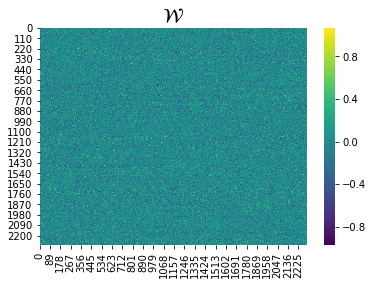

In [4]:
plt.title('${\cal W} $', fontsize= 20)
sns.heatmap(W_L048_all, linewidths= 0.0, cmap= 'viridis')
plt.show()

#### SVD of ${\cal W} $

In [5]:
u_L048_all, s_L048_all, v_L048_all = torch.svd(W_L048_all)

[]

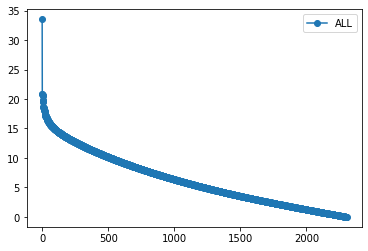

In [6]:
plt.plot(s_L048_all.numpy(), label= 'ALL', marker= 'o')
plt.legend()
plt.plot()

In [20]:
type_L = 'ALL'
L_str = str(L)

file_name = 'weight_analysis/L0%s/L0%s_%s_W_svd_left_eigvec.pt' % (L_str, L_str, type_L)
torch.save(u_L048_all, file_name)

file_name = 'weight_analysis/L0%s/L0%s_%s_W_svd_right_eigvec.pt' % (L_str, L_str, type_L)
torch.save(v_L048_all, file_name)

file_name = 'weight_analysis/L0%s/L0%s_%s_W_svd_singular_values.pt' % (L_str, L_str, type_L)
torch.save(s_L048_all, file_name)

#### Sampling Ising states using the left singular vectors $u$

mag =  0.02517


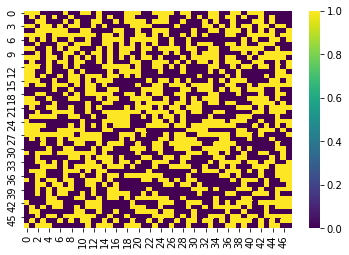

mag =  0.01215


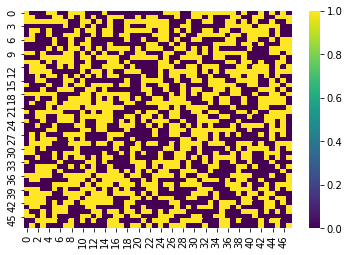

mag =  0.02517


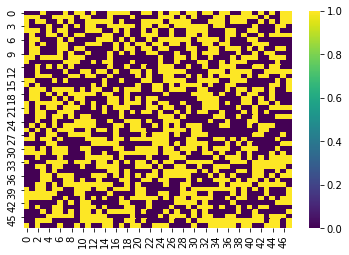

mag =  0.02604


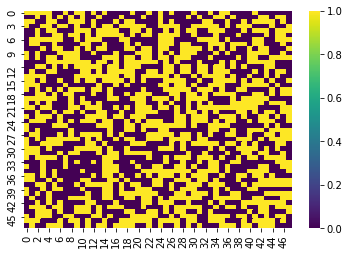

mag =  0.01997


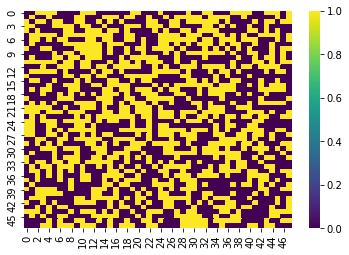

mag =  0.01823


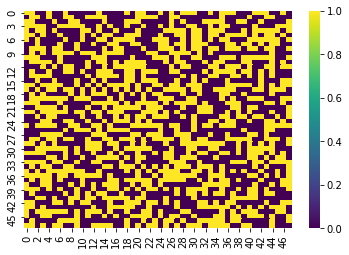

mag =  0.00434


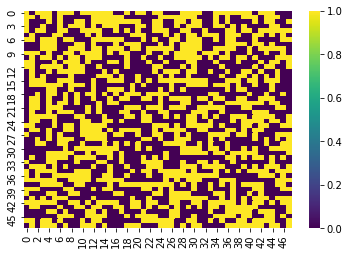

mag =  0.03385


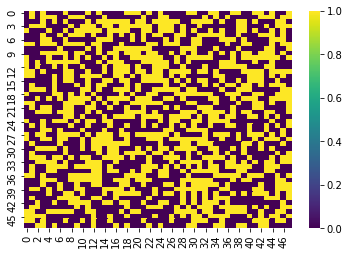

mag =  0.00347


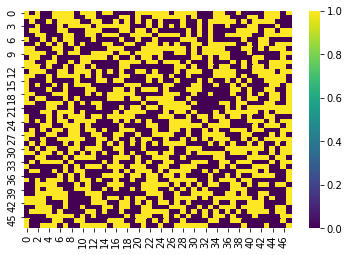

mag =  0.01128


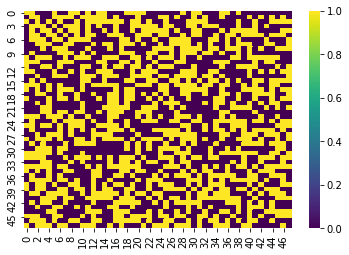

In [7]:
for j in range(10):
    p = torch.sigmoid(u_L048_all[j])
    rand_prob = torch.rand(p.size())
    state = F.relu( torch.sign( p - rand_prob ) ).reshape((L,L))
    mag = (2*state - 1 ).mean().abs().item()
    print('mag =  %.5f' % mag)
    sns.heatmap(state, linewidths= 0.0, cmap= 'viridis')
    plt.show()

#### Sampling Ising states using the right singular vectors $v$

mag =  0.00347


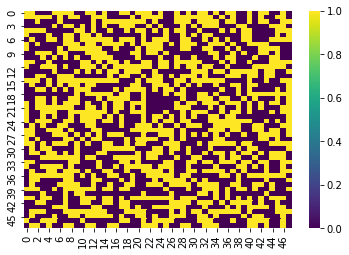

mag =  0.01302


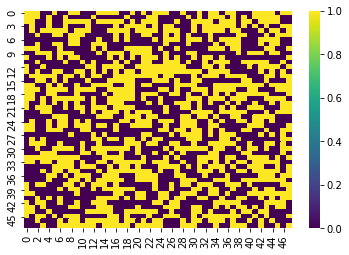

mag =  0.02257


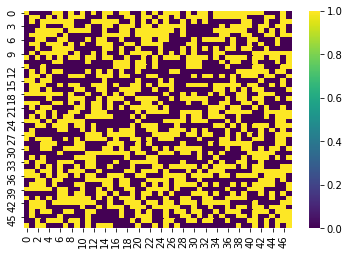

mag =  0.00955


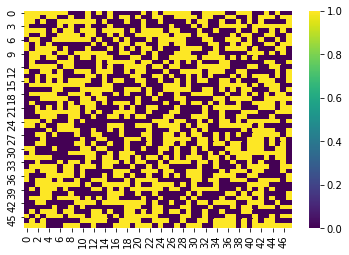

mag =  0.02083


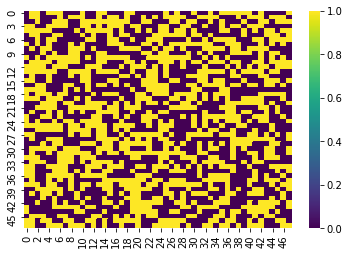

mag =  0.02691


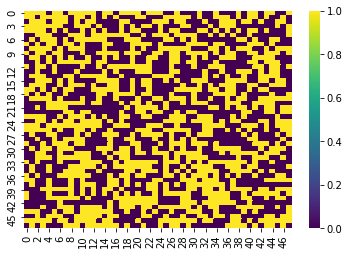

mag =  0.01997


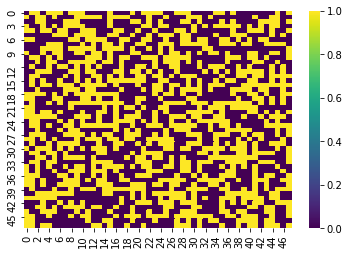

mag =  0.00260


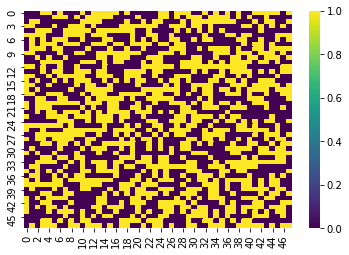

mag =  0.00955


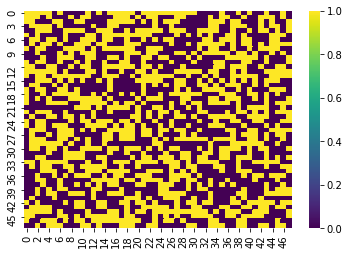

mag =  0.00260


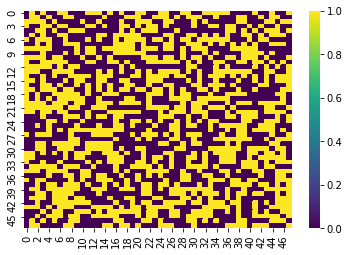

In [8]:
for j in range(10):
    p = torch.sigmoid(v_L048_all[j])
    rand_prob = torch.rand(p.size())
    state = F.relu( torch.sign( p - rand_prob ) ).reshape((L,L))
    mag = (2*state - 1 ).mean().abs().item()
    print('mag =  %.5f' % mag)
    sns.heatmap(state, linewidths= 0.0, cmap= 'viridis')
    plt.show()

#### Eigenvalues of ${\cal W} $

There are imaginary eigenvalues.

In [9]:
eigen_val_vec_all_W = torch.eig(W_L048_all, eigenvectors= True)

In [10]:
eigen_all_W = eigen_val_vec_all_W[0]
eigen_all_W

tensor([[-23.9037,   0.0000],
        [ -4.2053,   6.6312],
        [ -4.2053,  -6.6312],
        ...,
        [  0.2281,   0.0000],
        [  0.0577,   0.0000],
        [ -0.2836,   0.0000]])

### Analysis of $ {\cal W} {\cal W}^{T}$

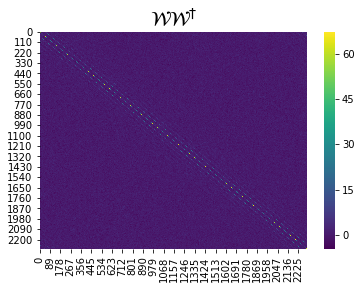

In [11]:
WW = torch.mm(W_L048_all.t(), W_L048_all)
sns.heatmap(WW, linewidths= 0.0, cmap= 'viridis')
plt.title('${\cal W} {\cal W}^{\dag}$', fontsize= 20)
plt.show()

#### Eigenvalues of ${\cal W} {\cal W}^T $

In [12]:
eigen_val_vec = torch.eig(W_L048_all*W_L048_all.t(), eigenvectors= True)

In [13]:
eigen_ALL = eigen_val_vec[0][:,0]

In [14]:
x = np.flip(np.arange(L*L))

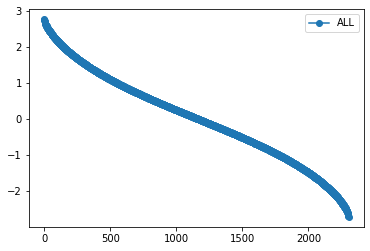

In [15]:
plt.plot(x, np.sort(eigen_ALL.numpy()), label= 'ALL', marker= 'o')
plt.legend()
plt.show()

In [16]:
eigen_val_vec[1][0]

tensor([-1.0849e-02, -2.5089e-02, -9.5883e-05,  ..., -1.5487e-02,
         1.0214e-02,  1.0811e-03])

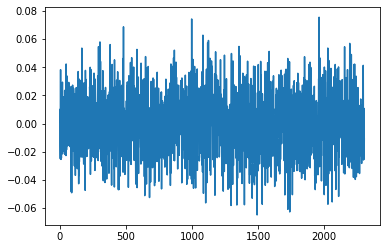

In [22]:
plt.plot(np.flip(np.arange(L*L)), eigen_val_vec[1][0].numpy()  )
plt.show()

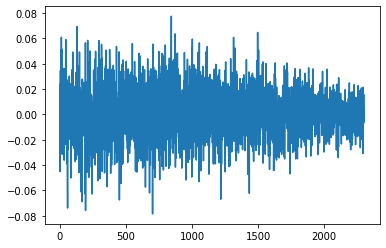

In [23]:
plt.plot(np.flip(np.arange(L*L)), eigen_val_vec[1][-1].numpy()  )
plt.show()

In [25]:
type_L = 'ALL'
L_str = str(L)

file_name = 'weight_analysis/L0%s/L0%s_%s_WW_eigen_eigen_val.pt' % (L_str, L_str, type_L)
torch.save(eigen_val_vec[0], file_name)

file_name = 'weight_analysis/L0%s/L0%s_%s_WW_eigen_eigen_vac.pt' % (L_str, L_str, type_L)
torch.save(eigen_val_vec[1], file_name)